In [2]:
import numpy as np
from collections import Counter
import seaborn as sns
import sklearn as sk
import scipy as sc
import seaborn as ns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=55, n_features=1, bias=10, noise=0.5, random_state=42)

In [15]:
print(X.std())
print(X.mean())
print(X.max())
print(X.min())

0.909054352933708
-0.18852617750541215
1.8522781845089378
-1.9596701238797756


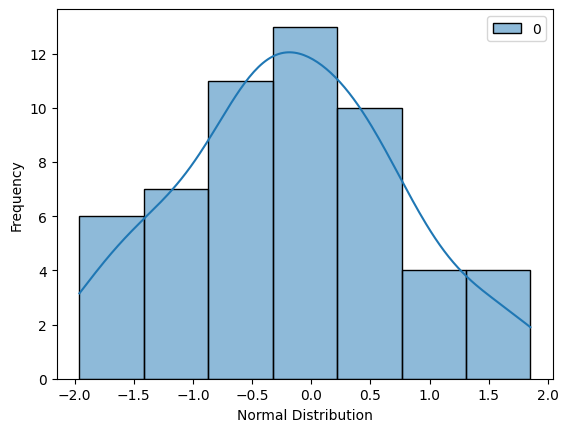

In [35]:
ax = sns.histplot(X, kde=True, color='red')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

-----

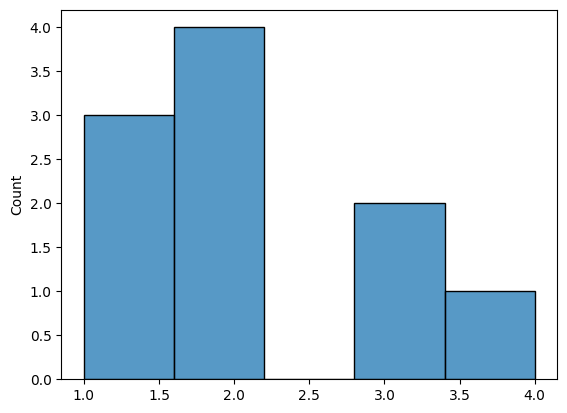

In [68]:
binom = np.random.binomial(n=4, p=0.5, size=10)

sns.histplot(binom)
plt.show()

In [69]:
Counter(binom)

Counter({2: 4, 4: 1, 3: 2, 1: 3})

In [98]:
import numpy as np

n, p = 10, 1/6
simulations = np.random.binomial(n, p, size=10000)  # 10 000 экспериментов

print(simulations)
# Считаем, сколько раз выпало ровно 3 шестёрки
prob_simulated = np.sum(simulations == 3) / len(simulations)
print(prob_simulated)  # Должно быть около 0.155


[2 1 2 ... 3 0 2]
0.1566


In [ ]:
import matplotlib.pyplot as plt

plt.hist(simulations, bins=range(12), density=True, alpha=0.7, edgecolor="black")
plt.xlabel("Количество шестёрок за 10 бросков")
plt.ylabel("Частота")
plt.title("Биномиальное распределение для 10 бросков кубика")
plt.show()


-------------

In [103]:
poisson = np.random.poisson(lam=5, size=1000)

print(poisson.mean())
print(poisson.std())
print(poisson.max())
print(poisson.min())

5.132
2.2379848078126
13
0


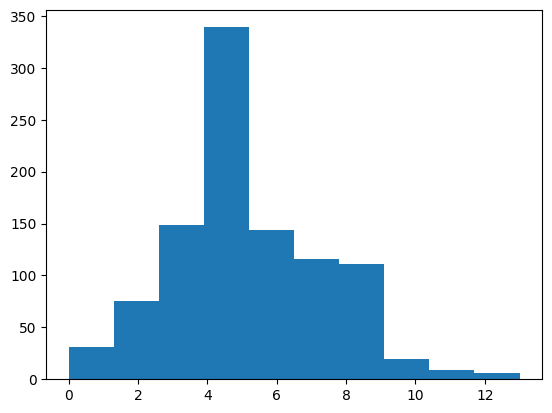

In [105]:
plt.hist(poisson)
plt.show()

In [106]:
def facot(x):
    
    if x == 0:
        return 1
    else:
        return x * facot(x - 1)
    
facot(5)

120

In [117]:
A = 5
k = 7

prob = sc.stats.poisson.pmf(k, A)

print(f'probability:  {prob:.3f}')

probability:  0.104


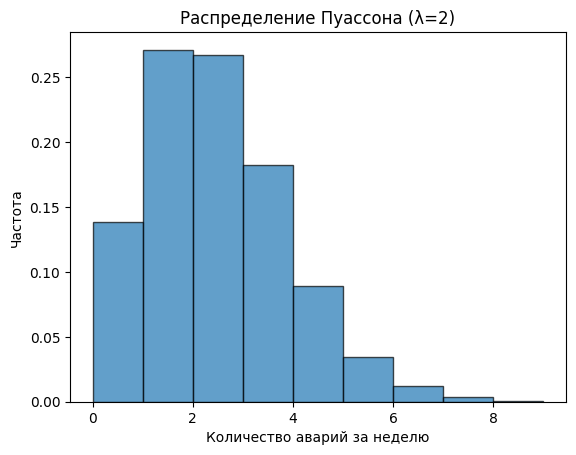

In [122]:
λ = 2  # Среднее число событий (аварий в неделю)
simulations = np.random.poisson(λ, 10000)  # 10 000 недель

plt.hist(simulations, bins=range(10), density=True, alpha=0.7, edgecolor="black")
plt.xlabel("Количество аварий за неделю")
plt.ylabel("Частота")
plt.title("Распределение Пуассона (λ=2)")
plt.show()


In [123]:
print(simulations.mean())

1.9861


----

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fitter import Fitter, get_distributions

men_weight = np.random.normal(loc=80, scale=10, size=500)
men_height = np.random.normal(loc=176, scale=10, size=500)

women_weight = np.random.normal(loc=60, scale=5, size=500)
women_height = np.random.normal(loc=166, scale=10, size=500)


In [68]:
men = np.ones(500)
women = np.zeros(500)

In [69]:
men_end = np.hstack([men_weight.reshape(-1, 1), men_height.reshape(-1, 1), men.reshape(-1, 1)])
women_end = np.hstack([women_weight.reshape(-1, 1), women_height.reshape(-1, 1), women.reshape(-1, 1)])

In [83]:
X = np.vstack([men_end, women_end])

np.random.shuffle(X)

In [89]:
df = pd.DataFrame(X, columns=['weight', 'height', 'sex'])

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.31it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.001979,982.513407,-13112.164370,inf,0.013950,0.988542
gamma,0.001979,982.545384,-13112.055276,inf,0.013949,0.988552
beta,0.001987,985.732721,-13101.063458,inf,0.014832,0.978123
norm,0.002003,982.817838,-13106.803542,inf,0.019203,0.847407
burr,0.004010,982.729371,-12399.124697,inf,0.071900,0.000061


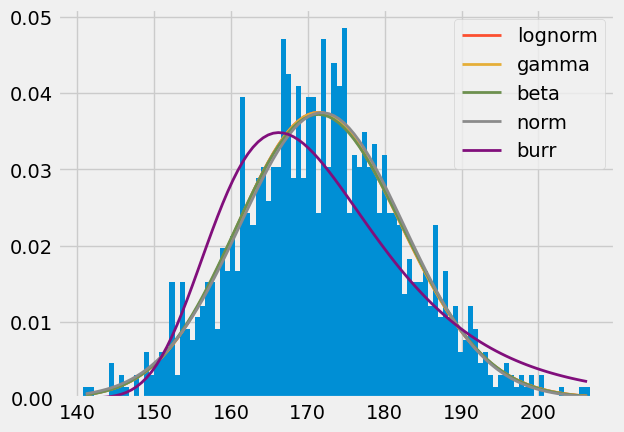

In [93]:
f = Fitter(df['height'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.96it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.005549,939.821704,-12074.338009,inf,0.074303,3.014182e-05
gamma,0.006015,936.460144,-12000.606520,inf,0.064555,4.571513e-04
lognorm,0.006204,937.082172,-11969.636420,inf,0.068690,1.511421e-04
beta,0.006228,945.504618,-11958.799034,inf,0.071384,7.084368e-05
norm,0.009143,959.762985,-11588.684593,inf,0.108017,1.291590e-10


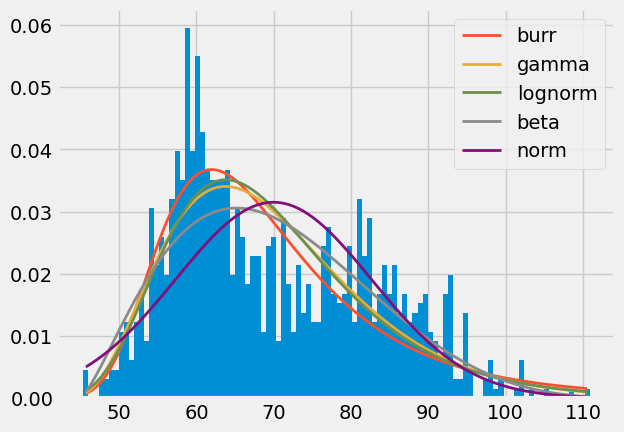

In [94]:
f = Fitter(df['weight'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [95]:
f.get_best(method='sumsquare_error')

{'burr': {'c': 7.585846917511796,
  'd': 6850.823224915206,
  'loc': -13.30691393795383,
  'scale': 23.878420760601323}}

In [96]:
f.fitted_param['gamma']

(4.353331517751842, 42.8131890229556, 6.238755897436243)

---

In [107]:
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected = chi2_contingency(df[['height', 'weight']])

print(f'p_value {chi2_stat:.3f}')
print(f'p_value {p_value:.3f}')

if p_value < 0.05:
    print('Feature are dependent')
else:
    print('Features are independent')

p_value 1364.866
p_value 0.000
Feature are dependent


In [108]:
from sklearn.feature_selection import chi2

stat, pvalue = chi2(df[['height', 'weight']], df['sex'])

print(f'stat {stat[0]}')
print(f'p_value {pvalue[0]:.3f}')

if pvalue[0] < 0.05:
    print('Feature are dependent')
else:
    print('Features are independent')

stat 118.37036266310896
p_value 0.000
Feature are dependent


---------------------

In [1]:
######### Scipy

import scipy as sc
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [13]:
sin_90 = sc.special.sindg(90) # синус 90 градусов

print(sin_90)

1.0


In [14]:
def _vratio(u, ineps, np):
    [s, c, d, phi] = sc.special.ellipj(u, mp)
    ret = abs(ineps - s / c)
    return ret

In [15]:
def target_func_f(x):
    return 3.0 * x ** 2

res = sc.integrate.quad(target_func_f, 0.0, 4.0)
print(res)

(64.0, 7.105427357601002e-13)


In [16]:
def target_function(y, x):
    return -2.0 * y

xi = np.linspace(0, 1, 10)
y0 = 1.0

result = sc.integrate.odeint(target_function, y0, xi)
print(result)

[[1.        ]
 [0.80073742]
 [0.64118042]
 [0.51341714]
 [0.41111231]
 [0.329193  ]
 [0.26359714]
 [0.21107209]
 [0.16901331]
 [0.13533527]]


In [17]:
xi

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [19]:
x = np.arange(5, 20)
y = np.exp(x/3.0)

f = inter

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [37]:
def my_exp(x, terms=20):
    result = 1.0
    term = 1.0
    for n in range(1, terms):
        term *= x / n  # (x^n / n!) через накопление
        result += term
    return result


X = 5

print(my_exp(X))

148.41310786833833


------

In [17]:
import numpy as np
import sklearn as sk
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
n_drops = 10
n_prob = 3
p = 1/6

In [45]:
### Здесь мы симулируем 10 000 раз игру, где 10 бросков кубика → считаем, сколько раз ровно 3 шестёрки.

prob = np.random.binomial(10, 1/6, 10000)

sum(prob == 3) / len(prob)

0.1509

In [51]:
sum(prob == 0)

1644

In [46]:
from collections import Counter

Counter(prob)

Counter({3: 1509, 1: 3256, 2: 2917, 0: 1644, 4: 516, 5: 135, 6: 21, 7: 2})

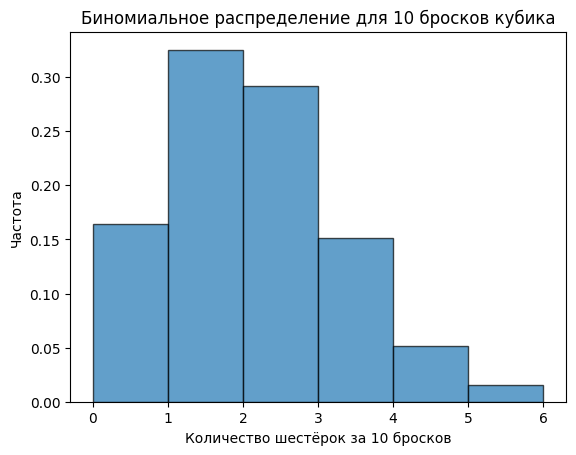

In [48]:
plt.hist(prob, bins=range(7), density=True, alpha=0.7, edgecolor="black")
plt.xlabel("Количество шестёрок за 10 бросков")
plt.ylabel("Частота")
plt.title("Биномиальное распределение для 10 бросков кубика")
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

In [3]:
train_df = pd.read_csv('Final_train.csv', index_col=0)

train_df.head()

,Survived,Sex,Age,Fare,Embarked
0,0,1,22.0,7.2500,0
1,1,0,38.0,71.2833,2
2,1,0,26.0,7.9250,0
3,1,0,35.0,53.1000,0
4,0,1,35.0,8.0500,0


In [4]:
train_df.describe(include='all')

,Survived,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,29.758889,32.204208,0.463524
std,0.486592,0.477990,13.002570,49.693429,0.791503
min,0.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,1.000000,30.000000,14.454200,0.000000
75%,1.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,1.000000,80.000000,512.329200,2.000000


<Axes: xlabel='Sex', ylabel='percent'>

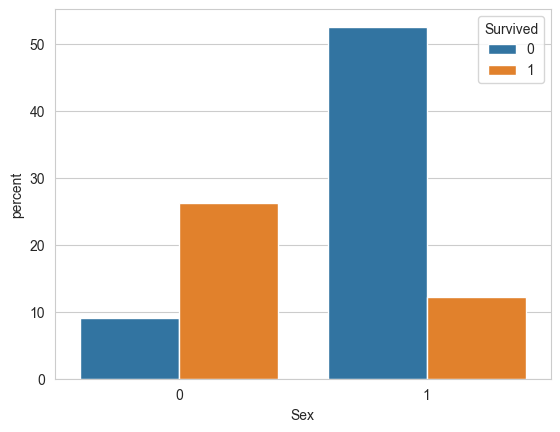

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Sex', data=train_df, hue='Survived', stat='percent')

In [30]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

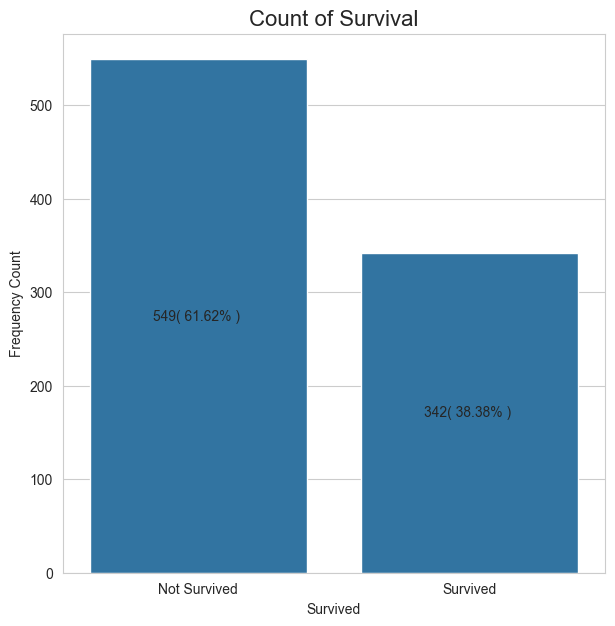

In [51]:
import warnings
warnings.filterwarnings('ignore')

figure, survive_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train_df["Survived"].value_counts().index, y = train_df["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Not Survived', 'Survived'])
survive_bar.set_ylabel('Frequency Count')
survive_bar.set_title('Count of Survival', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                     str(int(patch.get_height())) + f'( {(patch.get_height() / len(train_df.Survived)):.2%} ) '
                     , horizontalalignment='center', verticalalignment='center')

In [52]:
train_df.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [ ]:
fig, my_plot = plt.subplot(figsize=(15, 6), nrows=2, ncols=3)

features = train_df.columns

row, col, num_cols =  0, 0, 3

for u in features:
    sns.barplot(x = train_df[u].value_counts().index, y = train_df[u].value_counts(),
                x = my_plot[row, col])
    
    my_plot[row, col].set_xlabel('')
    my_plot